In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Create a Model with a input_shape of (300, 300, 3) and a learning rate of 1-e5

In [2]:
#load base model

base_model = keras.applications.InceptionV3(
                    weights='imagenet',
                    input_shape=(300, 300, 3),
                    include_top=False)

In [3]:
# Freeze base model
base_model.trainable = False

In [4]:
# add layers to model

inputs = keras.Input(shape = (300, 300, 3))

x = base_model(inputs)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(300, activation='relu')(x)

outputs = keras.layers.Dense(14, activation='softmax')(x)

model = keras.Model(inputs, outputs)

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               614700    
_________________________________________________________________
dense_1 (Dense)              (None, 14)                4214      
Total params: 22,421,698
Trainable params: 618,914
Non-trainable params: 21,802,784
_________________________________________________________________


In [6]:
model.compile(loss = keras.losses.CategoricalCrossentropy(),
              metrics = keras.metrics.CategoricalAccuracy())

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(samplewise_center=True,
    rotation_range=10,
    zoom_range=0.1, 
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    horizontal_flip=True,  
    vertical_flip=True,
    validation_split= 0.25)

test_gen = ImageDataGenerator(samplewise_center=True)

In [8]:
train = train_gen.flow_from_directory(
    '../dataset/Train',
    target_size = (150, 150),
    color_mode = 'rgb',
    class_mode = 'categorical',
    subset = 'training')

validate = train_gen.flow_from_directory(
    '../dataset/Train',
    target_size = (150, 150),
    color_mode = 'rgb',
    class_mode = 'categorical',
    subset = 'validation')


test = test_gen.flow_from_directory(
    '../dataset/Test',
    target_size = (150, 150),
    color_mode = "rgb",
    class_mode = "categorical")

Found 15787 images belonging to 14 classes.
Found 5257 images belonging to 14 classes.
Found 6738 images belonging to 14 classes.


In [9]:
train.class_indices

{'freshapples': 0,
 'freshbanana': 1,
 'freshcucumber': 2,
 'freshokra': 3,
 'freshoranges': 4,
 'freshpotato': 5,
 'freshtomato': 6,
 'rottenapples': 7,
 'rottenbanana': 8,
 'rottencucumber': 9,
 'rottenokra': 10,
 'rottenoranges': 11,
 'rottenpotato': 12,
 'rottentomato': 13}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

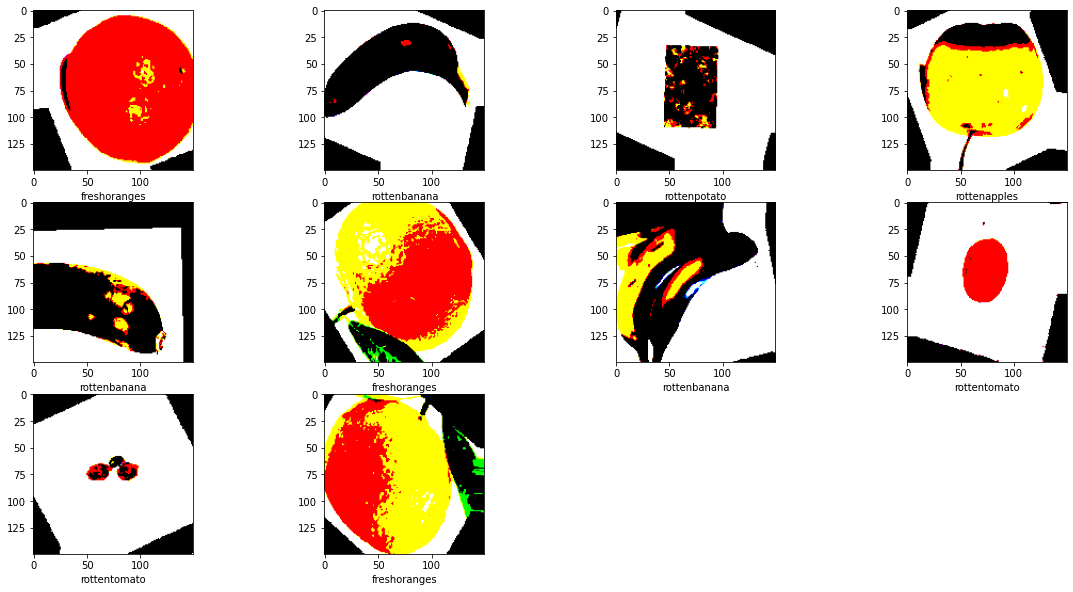

In [10]:
import matplotlib.pyplot as plt

# Encode the classes
classes = train.class_indices
classes = {indx: c for c, indx in classes.items()}


#PLotting some images 
images, labels=train.next()
plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(3, 4, i+1)
    plt.imshow(images[i])
    #plt.axis('off')
    plt.xlabel(classes[np.argmax(labels[i])])

In [11]:
callbacks = keras.callbacks.EarlyStopping(patience = 2, 
                                          monitor='val_loss',
                                          restore_best_weights=True)


model.fit(train,
          validation_data = validate,
          steps_per_epoch = train.samples/train.batch_size,
          validation_steps= validate.samples/validate.batch_size,
          epochs=5,
          callbacks= [callbacks])

Epoch 1/5
493/493 [==============================] - 299s 600ms/step - loss: 10.9673 - categorical_accuracy: 0.2375 - val_loss: 2.6143 - val_categorical_accuracy: 0.2760
Epoch 2/5
493/493 [==============================] - 294s 596ms/step - loss: 2.0765 - categorical_accuracy: 0.3130 - val_loss: 2.6716 - val_categorical_accuracy: 0.2903
Epoch 3/5
493/493 [==============================] - 304s 617ms/step - loss: 1.8752 - categorical_accuracy: 0.3634 - val_loss: 2.3366 - val_categorical_accuracy: 0.3384
Epoch 4/5
493/493 [==============================] - 310s 628ms/step - loss: 1.8196 - categorical_accuracy: 0.3848 - val_loss: 3.0109 - val_categorical_accuracy: 0.3053
Epoch 5/5
493/493 [==============================] - 316s 640ms/step - loss: 1.7759 - categorical_accuracy: 0.3957 - val_loss: 2.2251 - val_categorical_accuracy: 0.3095


In [12]:
# Unfreeze the base model
base_model.trainable = True

# Compile the model with a low learning rate
model.compile(optimizer=keras.optimizers.Adam(learning_rate = 1e-5),
               loss=keras.losses.CategoricalCrossentropy(),
               metrics=[keras.metrics.CategoricalAccuracy()])

In [13]:
model.fit(train,
          validation_data = validate,
          steps_per_epoch = train.samples/train.batch_size,
          validation_steps= validate.samples/validate.batch_size,
          epochs=5,
          callbacks= [callbacks])

Epoch 1/5
493/493 [==============================] - 856s 2s/step - loss: 1.6898 - categorical_accuracy: 0.3835 - val_loss: 1.3178 - val_categorical_accuracy: 0.6017
Epoch 2/5
493/493 [==============================] - 839s 2s/step - loss: 0.6180 - categorical_accuracy: 0.8366 - val_loss: 0.9735 - val_categorical_accuracy: 0.7563
Epoch 3/5
493/493 [==============================] - 873s 2s/step - loss: 0.3038 - categorical_accuracy: 0.9087 - val_loss: 0.8495 - val_categorical_accuracy: 0.8058
Epoch 4/5
493/493 [==============================] - 860s 2s/step - loss: 0.1725 - categorical_accuracy: 0.9487 - val_loss: 0.8538 - val_categorical_accuracy: 0.8237
Epoch 5/5
493/493 [==============================] - 834s 2s/step - loss: 0.1244 - categorical_accuracy: 0.9612 - val_loss: 0.9109 - val_categorical_accuracy: 0.8301


In [14]:
model.evaluate(test, steps= test.samples/test.batch_size)

210/210 [==============================] - 69s 328ms/step - loss: 0.2145 - categorical_accuracy: 0.9294


[0.21453940868377686, 0.9293559193611145]